## Task-02 Prediction using Unsupervised ML
## Submitted By - Muthu Krishnan

In this section with the given ‘Iris’ dataset, we are going to predict the optimum number of clusters and show some visual representations for detail insights.

K-Means is one of the simplest unsupervised learning algorithms that solves the clustering problem.<br>
It groups all the objects in such a way that objects in the same group (group is a cluster) are more similar (in some sense) to each other than to those in other groups. <br>
For example, assume you have an image with a red ball on the green grass. <br>
K-Means will split all pixels into two clusters. <br>
The first cluster will contain the pixels of the ball, the second cluster will contain the pixels of the grass.

In [4]:
#IRIS Dataset contains several features of iris flowers of 3 species. 
#Species are belongs to the categories such as "Iris-setosa", "Iris-versicolor", and "Iris-virginica". 
#Each flower contains 5 features: Petal Length, Petal Width, Sepal Length, Sepal Width, and Species.

#### Let’s see the steps on how the K-means machine learning algorithm works using the Python programming language.
#### We’ll use the Scikit-learn library and Iris dataset to illustrate a K-means clustering.

In [27]:
#let’s start by importing the required libraries 
#Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [28]:
#Load the Iris dataset using read_csv method and store it in iris
#import the dataset
iris = pd.read_csv(r'C:\Users\Lenovo\Desktop\GRIP Spark Foundation Internship\Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
#Now we can select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. 
#For this, we are going to use the iloc function on iris, and the column index (0,1,2,3) for the above four columns are used

### Let's plot the data

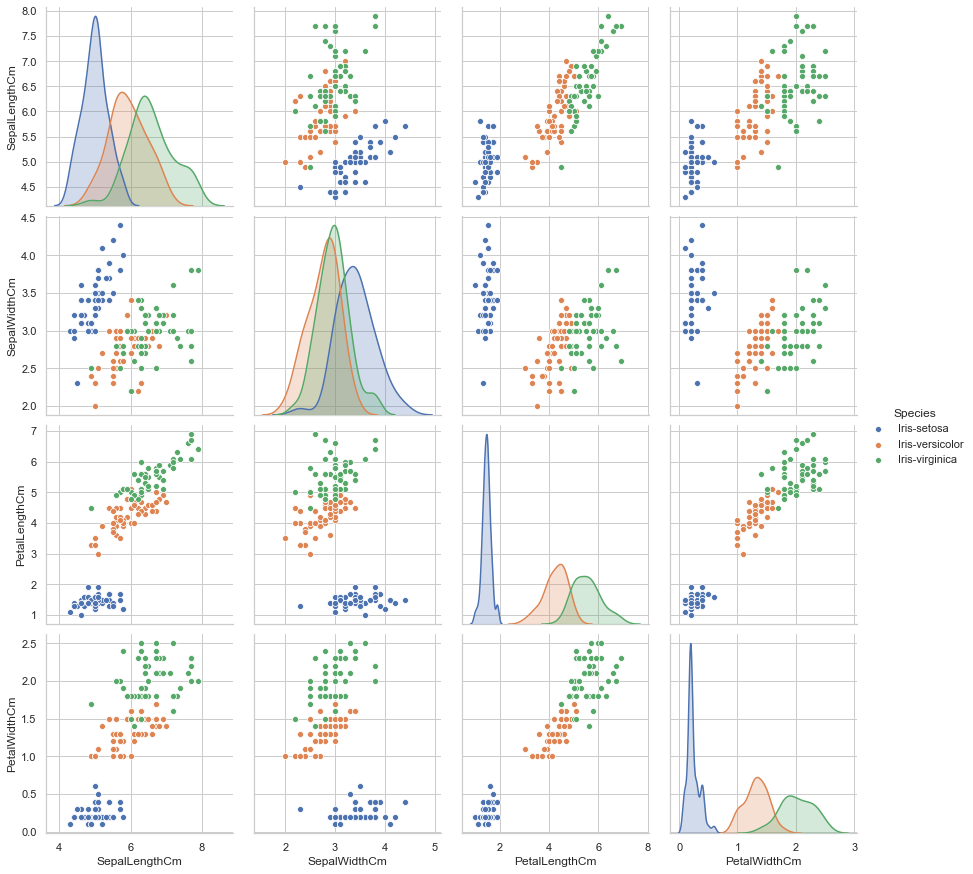

In [33]:
sns.set(style='whitegrid')
sns.pairplot(iris.drop("Id", axis=1),hue='Species',height=3, diag_kind="kde")

In [34]:
x = iris.iloc[:, [0,1,2,3]].values

In [35]:
# We will implement k-means clustering using k=5. 
# For this we can instantiate the KMeans class and assign it to the variable kmeans

In [36]:
Kmean = KMeans(n_clusters=5)
pred_Kmean=Kmean.fit(x)

In [37]:
print(pred_Kmean)

KMeans(n_clusters=5)


In [38]:
# Here is the code to find the center of the clusters:
Kmean.cluster_centers_


array([[ 16.        ,   5.01935484,   3.43870968,   1.47741935],
       [106.5       ,   6.3       ,   2.87666667,   5.15666667],
       [ 46.        ,   5.36896552,   3.20689655,   2.45172414],
       [136.        ,   6.59655172,   3.00344828,   5.47586207],
       [ 76.        ,   5.96451613,   2.74516129,   4.30322581]])

In [39]:
#Elbow method, which is designed to help find the optimal number of clusters in a dataset. 
#So let’s use this method to calculate the optimum value of k.

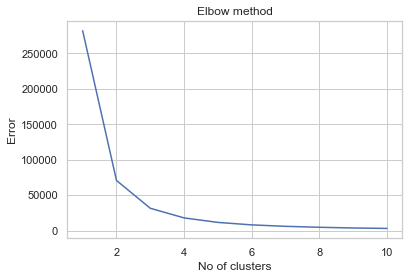

In [40]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [41]:
# Note that shape of the elbow is approximately formed at the point 3.

In [42]:
# As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
# So we can assign number of clusters is 3.

### Implement Kmeans using the value 3

In [43]:
kmeans3= KMeans(n_clusters =3)
y_kmeans3=kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [44]:
kmeans3.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

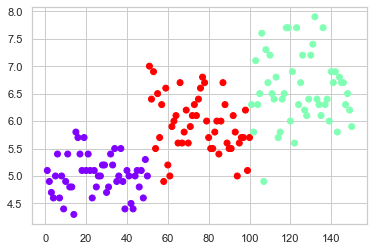

In [45]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')